# Linear Regression with PyTorch

This is a simple implementation of a Linear Regression algorithm with the Sao Paulo beer consumption dataset available in https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# importing dataset
beer_ds = pd.read_csv("./datasets/beer_consumption.csv")
beer_ds.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1,29.799
4,2015-01-05,"23,82",21,"28,3",0,0,28.900


In [3]:
# removing the day since it is already represented as "final de semana"
beer_ds = beer_ds.iloc[:,1:]
beer_ds.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,"27,3","23,9","32,5",0,0,25.461
1,"27,02","24,5","33,5",0,0,28.972
2,"24,82","22,4","29,9",0,1,30.814
3,"23,98","21,5","28,6","1,2",1,29.799
4,"23,82",21,"28,3",0,0,28.900


In [4]:
# suffling the dataset
beer_ds = shuffle(beer_ds, random_state=101)
beer_ds.reset_index(drop=True, inplace=True)
beer_ds.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,"25,06","19,5","30,4","16,4",1,26.836
1,"21,36","18,5","27,7",0,0,22.356
2,"16,76","11,3","26,7",0,0,24.227
3,"17,54","15,3","20,4",0,0,20.740
4,"21,86","19,5","25,6","3,4",0,22.741


In [5]:
# verifying the types of the columns
beer_ds.dtypes
beer_ds.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [6]:
# changing the types of the columns, first to string, then change the coma to dot, and then to float 
cols = ['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)']
for c in cols:
    beer_ds[c] = beer_ds[c].astype(str)
    beer_ds[c] = beer_ds[c].str.replace(',', '.')
    beer_ds[c] = beer_ds[c].astype(float)
    
beer_ds.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,25.06,19.5,30.4,16.4,1,26.836
1,21.36,18.5,27.7,0.0,0,22.356
2,16.76,11.3,26.7,0.0,0,24.227
3,17.54,15.3,20.4,0.0,0,20.740
4,21.86,19.5,25.6,3.4,0,22.741


In [7]:
# creating model of linear regression 
class LinearRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.bn_cont = nn.BatchNorm1d(in_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [8]:
model = LinearRegression(in_features=5, out_features=1)
model

LinearRegression(
  (linear): Linear(in_features=5, out_features=1, bias=True)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [9]:
# dataset split into 20% for test and 80% for training
X = beer_ds.drop('Consumo de cerveja (litros)',axis=1).values
y = beer_ds['Consumo de cerveja (litros)'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).reshape(-1,1)
y_test = torch.FloatTensor(y_test).reshape(-1,1)

In [10]:
# setting the Loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
# set number of epochs and train model passing
# forward the train set and comparing with real values
epochs = 5000
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    # compute the loss, gradients and update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 28.32010269
epoch: 11  loss: 27.62041092
epoch: 21  loss: 26.92309189
epoch: 31  loss: 26.22858238
epoch: 41  loss: 25.53726578
epoch: 51  loss: 24.84948540
epoch: 61  loss: 24.16555977
epoch: 71  loss: 23.48581314
epoch: 81  loss: 22.81056595
epoch: 91  loss: 22.14016533
epoch: 101  loss: 21.47497749
epoch: 111  loss: 20.81538582
epoch: 121  loss: 20.16180229
epoch: 131  loss: 19.51465797
epoch: 141  loss: 18.87440872
epoch: 151  loss: 18.24152374
epoch: 161  loss: 17.61648941
epoch: 171  loss: 16.99979210
epoch: 181  loss: 16.39192772
epoch: 191  loss: 15.79337788
epoch: 201  loss: 15.20460033
epoch: 211  loss: 14.62602806
epoch: 221  loss: 14.05804157
epoch: 231  loss: 13.50096893
epoch: 241  loss: 12.95507622
epoch: 251  loss: 12.42056179
epoch: 261  loss: 11.89756584
epoch: 271  loss: 11.38618469
epoch: 281  loss: 10.88649559
epoch: 291  loss: 10.39859486
epoch: 301  loss: 9.92264080
epoch: 311  loss: 9.45889091
epoch: 321  loss: 9.00774288
epoch: 331  loss: 8.569

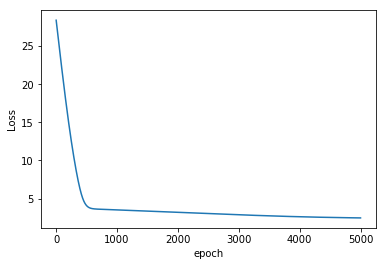

In [12]:
# plot errors by epochs 
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [13]:
# evaluatig the test set passing the test set into the trained model
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'{loss:.8f}')

2.60434151


In [14]:
# comparing predicted, actual and the difference
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(len(y_test)):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1.  23.0933  23.0550   0.0383
 2.  26.4017  26.7930   0.3913
 3.  26.3769  21.9550   4.4219
 4.  24.3832  28.7420   4.3588
 5.  20.7969  23.0650   2.2681
 6.  25.2416  27.7130   2.4714
 7.  24.5000  23.6280   0.8720
 8.  29.8355  30.5050   0.6695
 9.  27.7153  23.6140   4.1013
10.  19.3542  20.7400   1.3858
11.  23.0393  20.2980   2.7413
12.  30.0145  30.1270   0.1125
13.  23.5513  25.3430   1.7917
14.  32.1191  30.8250   1.2941
15.  18.2800  21.4540   3.1740
16.  27.5484  24.9740   2.5744
17.  25.6439  22.0010   3.6429
18.  25.7982  27.4200   1.6218
19.  16.6311  19.4630   2.8319
20.  27.1654  25.4890   1.6764
21.  23.5774  22.6200   0.9574
22.  19.8733  21.2450   1.3717
23.  24.1046  24.5940   0.4894
24.  24.8517  24.2130   0.6387
25.  26.6860  22.3890   4.2970
26.  24.8408  24.1140   0.7268
27.  36.8018  37.6900   0.8882
28.  22.5866  21.5930   0.9936
29.  36.2731  30.5240   5.7491
30.  28.7154  26.2720   2.4434
31.  21.0856  24.2150   3.1294
32.  26.